In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/project_vanguard_joseba/client_profiles_clean.csv')
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
# Shape of the data
df.shape

(70594, 9)

In [7]:
# Column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70594 entries, 0 to 70593
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [9]:
# Descriptive statistics
df.describe(include='all')

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594,70594.000000,7.059400e+04,70594.000000,70594.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,24125,NaN,NaN,NaN,NaN
mean,5.005026e+06,12.053007,150.659999,46.442240,NaN,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,NaN,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,NaN,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,NaN,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,NaN,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,NaN,2.000000,1.375461e+05,6.000000,7.000000


In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
# Column-wise null values
df.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

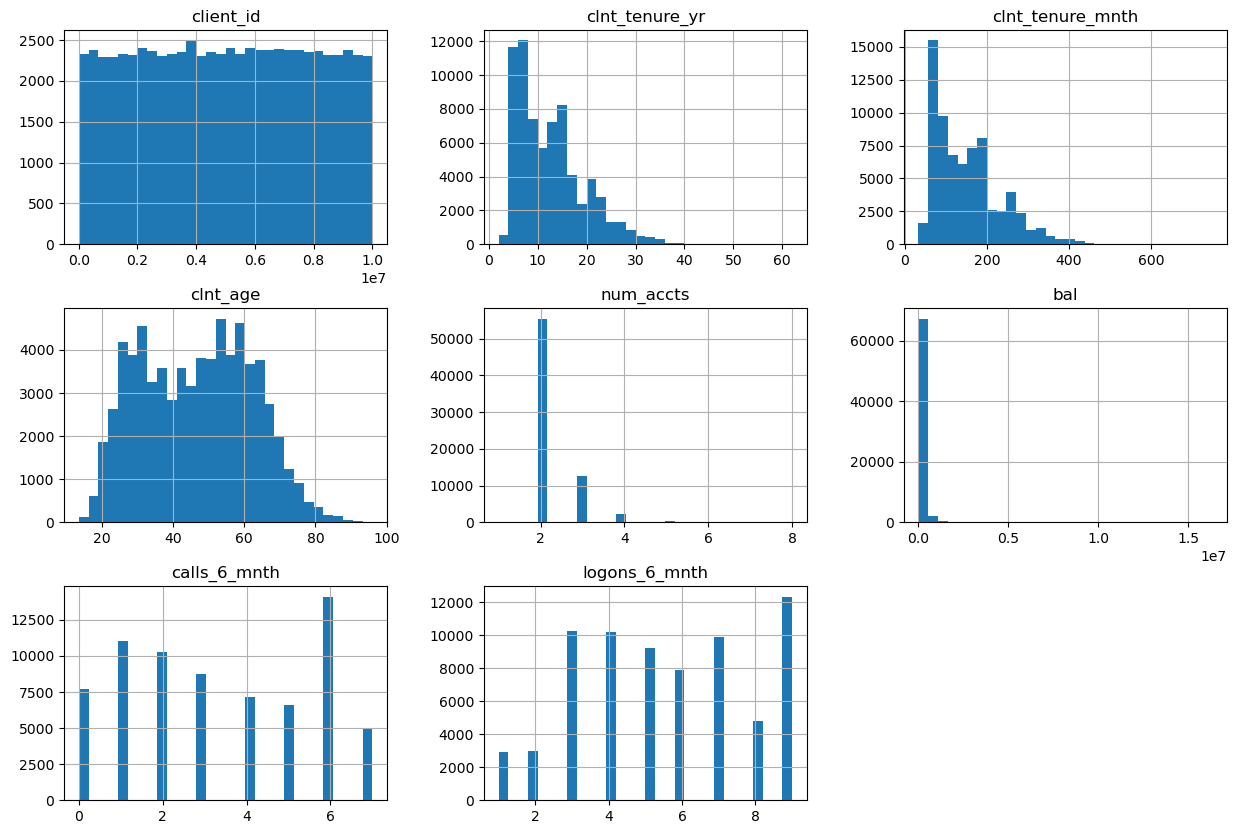

In [15]:
# Histograms for distributions
df.hist(bins=30, figsize=(15,10))
plt.show()

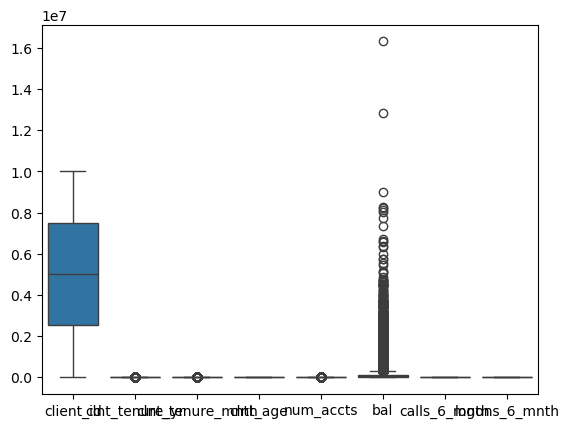

In [23]:
# Boxplots for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
sns.boxplot(data=df[numerical_columns])
plt.show()

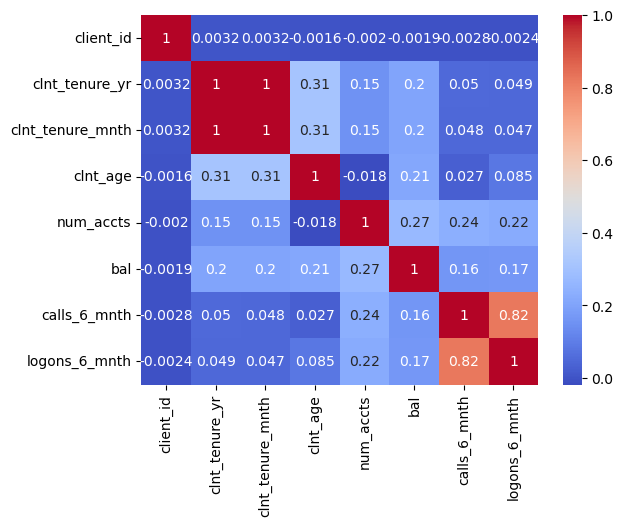

In [19]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

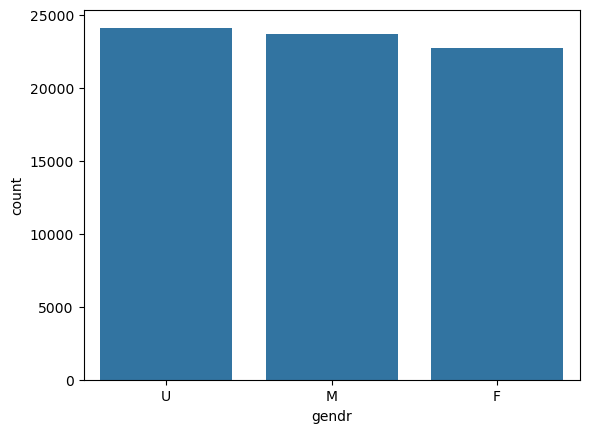

In [25]:
# Count plots for categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.show()

## Who are the primary clients using this online process?

In [31]:
# gender distribution
df['gendr'].value_counts(normalize=True)

gendr
U    0.341743
M    0.336063
F    0.322195
Name: proportion, dtype: float64

In [33]:
# age distribution
df['clnt_age'].describe()

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

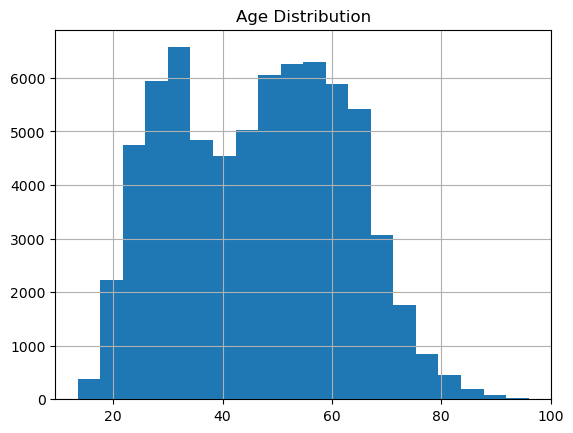

In [35]:
df['clnt_age'].hist(bins=20)
plt.title('Age Distribution')

In [39]:
# Clients tenure (years)
df[['clnt_tenure_yr']].describe()

,clnt_tenure_yr
count,70594.000000
mean,12.053007
std,6.871850
min,2.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,62.000000


## Are the primary clients younger or older? New or long standing?

Text(0.5, 1.0, 'Age vs. Client Tenure')

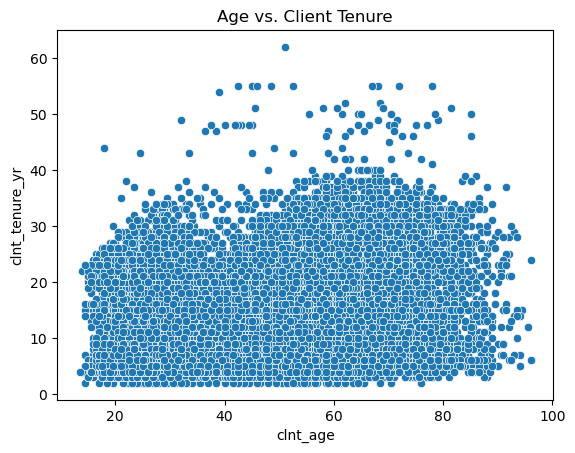

In [42]:
# combine age and tenure

sns.scatterplot(data=df, x='clnt_age', y='clnt_tenure_yr')
plt.title("Age vs. Client Tenure")

In [60]:
df['client_segment'] = pd.cut(df['clnt_age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])

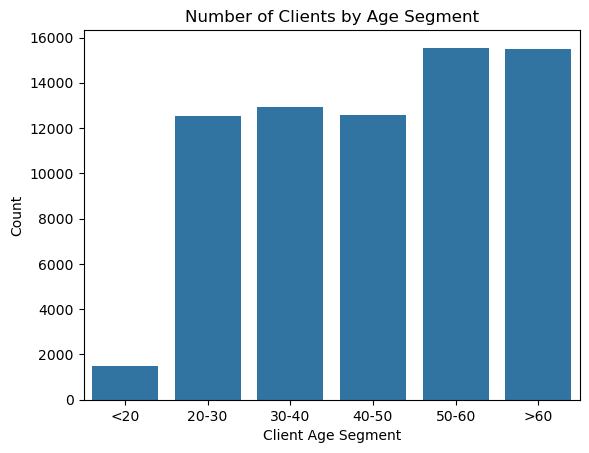

In [62]:
sns.countplot(data=df, x='client_segment', order=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
plt.title("Number of Clients by Age Segment")
plt.xlabel("Client Age Segment")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='clnt_age', ylabel='logons_6_mnth'>

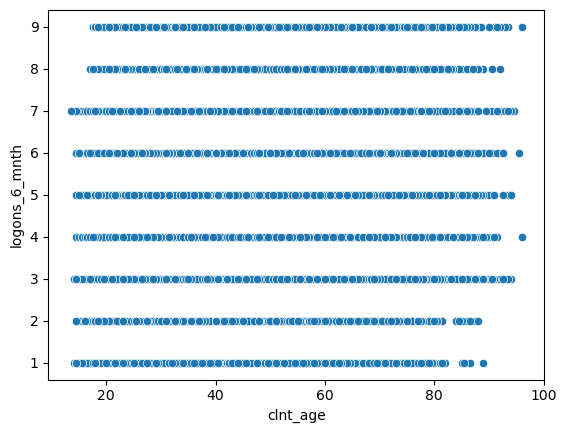

In [64]:
# Do older clients use the platform less often?

sns.scatterplot(x='clnt_age', y='logons_6_mnth', data=df)

<Axes: xlabel='client_segment', ylabel='logons_6_mnth'>

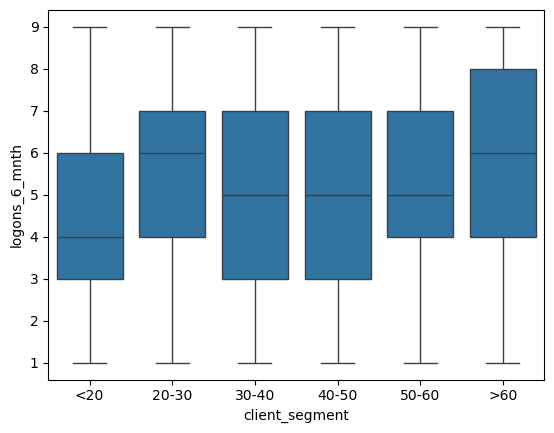

In [68]:
# Account and usage patterns
sns.boxplot(x='client_segment', y='logons_6_mnth', data=df)

In [70]:
# Create a new column to label users as Active or Passive
df['user_type'] = df['logons_6_mnth'].apply(lambda x: 'Active' if x > 5 else 'Passive')

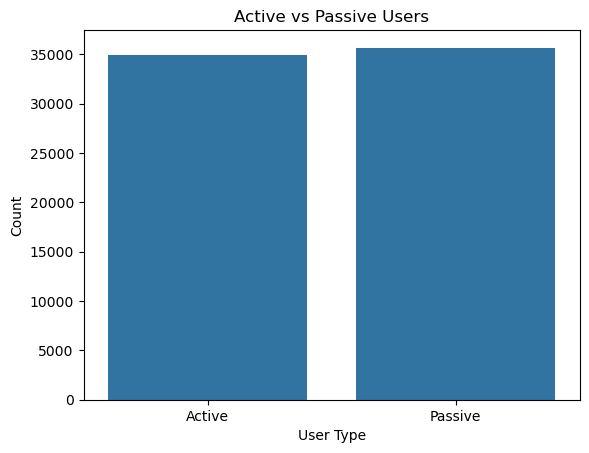

In [72]:
sns.countplot(data=df, x='user_type')
plt.title("Active vs Passive Users")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.show()

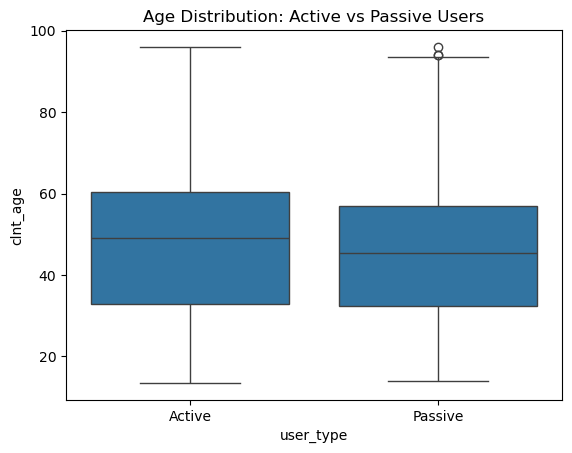

In [74]:
# age distribution by user type

sns.boxplot(data=df, x='user_type', y='clnt_age')
plt.title("Age Distribution: Active vs Passive Users")
plt.show()

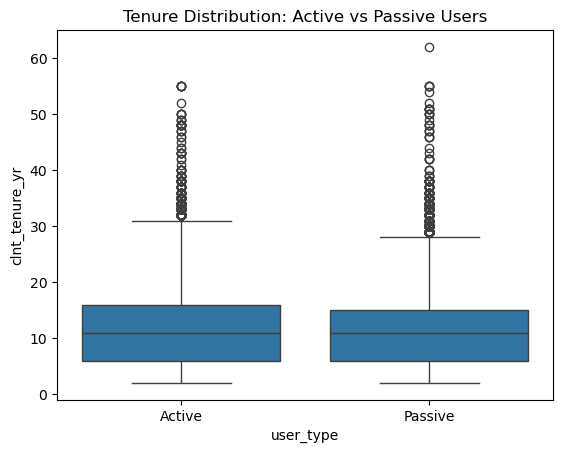

In [76]:
# Tenure by user type
sns.boxplot(data=df, x='user_type', y='clnt_tenure_yr')
plt.title("Tenure Distribution: Active vs Passive Users")
plt.show()

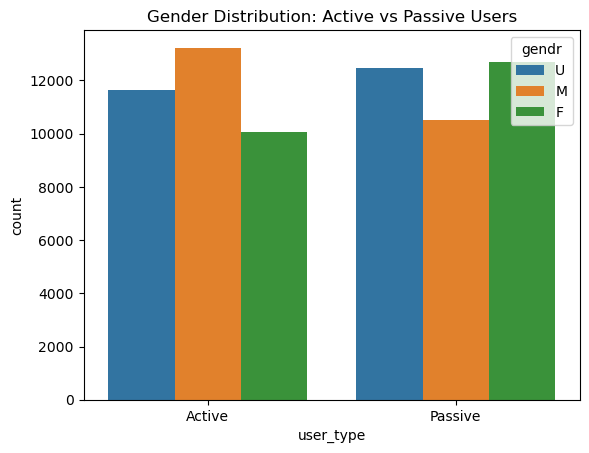

In [78]:
# gender breakdown by user type
sns.countplot(data=df, x='user_type', hue='gendr')
plt.title("Gender Distribution: Active vs Passive Users")
plt.show()

In [82]:
# Use crosstab to combine with client segments
pd.crosstab(df['client_segment'], df['user_type'], normalize='index') * 100

user_type,Active,Passive
client_segment,,
<20,34.279919,65.720081
20-30,50.506178,49.493822
30-40,46.148492,53.851508
40-50,43.931692,56.068308
50-60,49.102836,50.897164
>60,57.764015,42.235985
